CIFAR-10 -- replicating: https://github.com/fastai/fastai/blob/master/courses/dl1/cifar10.ipynb

---

## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH, exist_ok=True)

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [4]:
def get_data(sz, bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlipXY()], pad = sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [5]:
bs = 64

#### Look at Data:

In [6]:
data = get_data(32, 4)

In [7]:
x, y = next(iter(data.trn_dl))

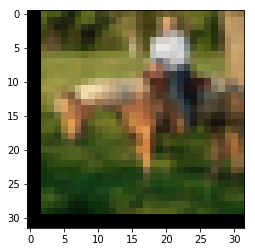

In [8]:
plt.imshow(data.trn_ds.denorm(x)[0]);

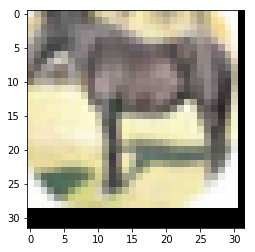

In [12]:
plt.imshow(data.trn_ds.denorm(x)[1]);

#### Initital Model:

In [9]:
from fastai.models.cifar10.resnext import resnext29_8_64

model  = resnext29_8_64()
bmodel = BasicModel(model.cuda(), name='cifar10_rn29_8_64')

In [10]:
data = get_data(8, bs*4)

In [11]:
learn = ConvLearner(data, bmodel)
learn.unfreeze()

In [12]:
lr = 1e-2; wd = 5e-4

In [13]:
learn.lr_find()

A Jupyter Widget

[  0.        2.89241  44.72694   0.10498]                   



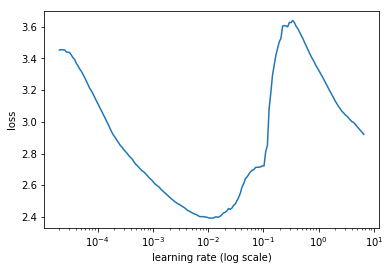

In [14]:
learn.sched.plot()

In [15]:
%time learn.fit(lrs=lr, n_cycle=1)

A Jupyter Widget

[ 0.       1.69832  1.7303   0.41435]                       

CPU times: user 5min 28s, sys: 5min 29s, total: 10min 58s
Wall time: 10min 59s


In [16]:
learn.fit(lr, 2, cycle_len=1)

A Jupyter Widget

[ 0.       1.47576  1.40799  0.49678]                       
[ 1.       1.36862  1.32542  0.52109]                       



In [17]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

A Jupyter Widget

[ 0.       1.32025  1.28466  0.53652]                       
[ 1.       1.29176  1.29989  0.55352]                       
[ 2.       1.15833  1.20081  0.56719]                       
[ 3.       1.23722  1.27487  0.54541]                       
[ 4.       1.14385  1.17694  0.58555]                       
[ 5.       1.02161  1.11706  0.60801]                       
[ 6.       0.94498  1.09864  0.61514]                        



In [18]:
learn.save('8x8_8')

### 16x16:

In [ ]:
learn.load('8x8_8')

In [19]:
learn.set_data(get_data(16, bs*2))

In [20]:
%time learn.fit(1e-3, 1, wds=wd)

A Jupyter Widget

[ 0.       1.68779  1.81414  0.45995]                       

CPU times: user 2min 56s, sys: 2min 15s, total: 5min 12s
Wall time: 5min 11s


In [21]:
# setting batch size from 128 to 64, to try & avoid GPU MEM error
learn.set_data(get_data(16, bs))

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

A Jupyter Widget

 98%|█████████▊| 764/782 [15:00<00:21,  1.18s/it, loss=9.55]

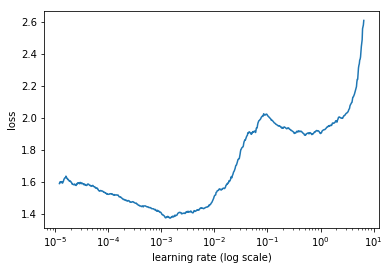

In [24]:
learn.sched.plot()

## NOTE: pick back up here later

I wonder if this graph will be different with different batch sizes.

In [25]:
learn.save('16x16_8')

In [ ]:
data = get_data(8, bs*4)
learn.load('16x16_8')

In [ ]:
lr = le-2

In [ ]:
learn.fit(lr, 2, cycle_len=1, wds=wd)

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('16x16_8')

### 24x24

In [ ]:
learn.load('16x16_8')

In [ ]:
learn.set_data(get_data(24, bs))

In [ ]:
learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lr, 1, cycle_len=1, wds=wd)

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('24x24_8')

In [ ]:
log_preds, y = learn.TTA()
metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)

### 32x32

In [ ]:
learn.load('24x24_8')

In [ ]:
learn.set_data(get_data(32, bs))

In [ ]:
learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.fit(lr, 3, cycle_len=4, wds=wd)

In [ ]:
log_preds, y = learn.TTA()
metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)

In [ ]:
learn.save('32x32_8')